In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import functools
def lts(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

price_1 = []
year = []
brand = []
model = []
emi_1= []
km_used = []
owner = []
fuel_type = []
engines = []
url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=11000'
for i in range(1,9):
    urls = (url +str(i))
    
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    #price
    prices = []
    price = soup.find_all('div','_7udZZ')
    for i in price:
        prices.append(i.text)
    for i in prices:
        a = re.findall(r"(\d+),(\d+),(\d+)",str(i))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            price_1.append(res)
            
    #NAMES
    names = []
    name = soup.find_all('h2','_3FpCg')
    for i in name:
        names.append(i.text)
    
    #year
    for i in names:
        a = (re.findall(r"(\d+)\s\w+\s\w+",str(i)))
        if len(a) > 0:
            year.append(a[0])
    
    #brand
    for i in names:
        a = (re.findall(r"\d+\s(\w+)\s\w+",str(i)))
        if len(a) > 0:
            brand.append(a[0])
    
    #model
    for i in names:
            a = i.split()[2:]
            if len(a) > 0:
                model.append(lts(a))
            
    #emi
    emi = soup.find_all('div','_2HFRN')
    emis = []
    for i in emi:
        emis.append(i.text)
    for i in emis:
        a = re.findall(r"(\d+),(\d+)/month",str(i))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            emi_1.append(res)
        
    #info
    infos = []
    info = soup.find_all('ul','bVR0c')
    for i in info:
        infos.append(i.text)
    
    #km_used
    for i in infos:
        a = re.findall(r"(\d+),(\d+)\skm\d+\w+\sOwner",str(i))
        b = re.findall(r"(\d+)\skm\d+\w+\sOwner",str(i))
        if len(a) > 0:
            res_1 = (''.join(map(str, a[0])))
            km_used.append(res_1)
        elif len(b) > 0:
            res_2 = (''.join(map(str, b[0])))
            km_used.append(res_2)
    
    #owner
    for i in infos:
        a = re.findall(r"\d+,\d+\skm(\d+\w+\sOwner)",str(i))
        b = re.findall(r"\d+\skm(\d+\w+\sOwner)\w+",str(i))
        if len(a) > 0:
            owner.append(a[0])
        else:
            owner.append(b[0])
    
    #fuel_type
    for i in infos:
        a = re.findall(r"\d+,\d+\skm\d+\w+\sOwner(\w+)",str(i))
        b = re.findall(r"\d+\skm\d+\w+\sOwner(\w+)",str(i))
        if len(a) > 0:
            fuel_type.append(a[0])
        else:
            fuel_type.append(b[0])
    
    #engine
    engine = soup.find_all('p','cvakB')
    for i in engine:
        engines.append(i.text)

In [2]:
city = []
for i in range(0,160):
    city.append("New Delhi")

In [3]:
df1 = pd.DataFrame({
    "Brand":brand,
    "Model":model,
    "Year":year,
    "City":city,
    "EMI(/month)":emi_1,
    "Prices(Rs.)":price_1,
    "KM Driven":km_used,
    "Fuel Type":fuel_type,
    "No. of Prior Owners":owner,
    "Engine Type":engines
})
df1

,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Maruti,Swift,2019,New Delhi,10455,534799,12046,Petrol,2nd Owner,LXI Manual
1,Maruti,Swift,2019,New Delhi,10448,534399,11404,Petrol,2nd Owner,LXI Manual
2,Hyundai,i10,2010,New Delhi,3353,171499,19647,Petrol,1st Owner,MAGNA 1.2 Manual
3,Hyundai,Grand i10,2018,New Delhi,10852,555099,6875,Petrol,2nd Owner,SPORTZ 1.2 KAPPA VTVT Manual
4,Hyundai,Grand i10,2018,New Delhi,10205,521999,12362,Petrol,2nd Owner,MAGNA 1.2 KAPPA VTVT Manual
...,...,...,...,...,...,...,...,...,...,...
155,KIA,CARENS,2022,New Delhi,31305,1666999,1925,Petrol,1st Owner,LUXURY 1.4G MT 7STR
156,Tata,ALTROZ,2021,New Delhi,14080,720176,7789,Petrol,1st Owner,XM+ 1.2 RTN
157,Maruti,Swift,2019,New Delhi,10596,541999,45291,Petrol,1st Owner,LXI Manual
158,Hyundai,i10,2013,New Delhi,4882,249699,64360,Petrol,1st Owner,MAGNA 1.2 KAPPA2 Manual


In [4]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd


price_1 = []
year = []
brand = []
model = []
emi_1 = []
km_used = []
owner = []
fuel_type = []
engines = []
url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=40000'
for i in range(1,9):
    urls = (url +str(i))
    
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    #price
    prices = []
    price = soup.find_all('div','_7udZZ')
    for i in price:
        prices.append(i.text)
    for i in prices:
        a = re.findall(r"(\d+),(\d+),(\d+)",str(i))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            price_1.append(res)
            
    #NAMES
    names = []
    name = soup.find_all('h2','_3FpCg')
    for i in name:
        names.append(i.text)
    
    #year
    for i in names:
        a = (re.findall(r"(\d+)\s\w+\s\w+",str(i)))
        if len(a) > 0:
            year.append(a[0])
    
    #brand
    for i in names:
        a = (re.findall(r"\d+\s(\w+)\s\w+",str(i)))
        if len(a) > 0:
            brand.append(a[0])
    
    #model
    for i in names:
            a = i.split()[2:]
            if len(a) > 0:
                model.append(lts(a))
            
    #emi
    emi = soup.find_all('div','_2HFRN')
    emis = []
    for i in emi:
        emis.append(i.text)
    for i in emis:
        a = re.findall(r"(\d+),(\d+)/month",str(i))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            emi_1.append(res)
        
    #info
    infos = []
    info = soup.find_all('ul','bVR0c')
    for i in info:
        infos.append(i.text)
    
    #km_used
    for i in infos:
        a = (re.findall(r"(\d+),(\d+)\skm\d+\w+\sOwner",str(i)))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            km_used.append(res)
    
    #owner
    for i in infos:
        a = (re.findall(r"\d+,\d+\skm(\d+\w+\sOwner)",str(i)))
        if len(a) > 0:
            owner.append(a[0])
    
    #fuel_type
    for i in infos:
        a = (re.findall(r"\d+,\d+\skm\d+\w+\sOwner(\w+)",str(i)))
        if len(a) > 0:
            fuel_type.append(a[0])
    
    #engine
    engine = soup.find_all('p','cvakB')
    for i in engine:
        engines.append(i.text)

In [5]:
city = []
for i in range(0,160):
    city.append("Mumbai")

In [6]:
df2 = pd.DataFrame({
    "Brand":brand,
    "Model":model,
    "Year":year,
    "City":city,
    "EMI(/month)":emi_1,
    "Prices(Rs.)":price_1,
    "KM Driven":km_used,
    "Fuel Type":fuel_type,
    "No. of Prior Owners":owner,
    "Engine Type":engines
})
df2

,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Hyundai,Santro Xing,2011,Mumbai,3668,187599,47979,Petrol,2nd Owner,GLS Manual
1,Honda,City,2010,Mumbai,5406,276499,46821,Petrol,2nd Owner,V MT PETROL Manual
2,Hyundai,i10,2015,Mumbai,5898,301699,42271,Petrol,2nd Owner,MAGNA 1.1 IRDE2 Manual
3,Maruti,Swift,2013,Mumbai,8107,414699,37591,Petrol,1st Owner,VXI Manual
4,Maruti,Swift Dzire,2013,Mumbai,8326,425899,46227,Petrol,1st Owner,VXI Manual
...,...,...,...,...,...,...,...,...,...,...
155,Renault,Kwid,2018,Mumbai,6702,342799,31778,Petrol,1st Owner,1.0 RXT Manual
156,Maruti,New Wagon-R,2021,Mumbai,12334,630899,24347,Petrol,2nd Owner,LXI CNG 1.0 L Manual
157,Maruti,Swift,2014,Mumbai,8143,416499,39653,Petrol,1st Owner,VXI Manual
158,Maruti,Alto K10,2015,Mumbai,5292,270699,55758,Petrol,3rd Owner,LXI CNG Manual


In [7]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd


price_1 = []
year = []
brand = []
model = []
emi_1 = []
km_used = []
owner = []
fuel_type = []
engines = []
url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=3686&pinId=50000'
for i in range(1,9):
    urls = (url +str(i))
    
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    #price
    prices = []
    price = soup.find_all('div','_7udZZ')
    for i in price:
        prices.append(i.text)
    for i in prices:
        a = re.findall(r"(\d+),(\d+),(\d+)",str(i))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            price_1.append(res)
        
    #NAMES
    names = []
    name = soup.find_all('h2','_3FpCg')
    for i in name:
        names.append(i.text)
    
    #year
    for i in names:
        a = (re.findall(r"(\d+)\s\w+\s\w+",str(i)))
        if len(a) > 0:
            year.append(a[0])
    
    #brand
    for i in names:
        a = (re.findall(r"\d+\s(\w+)\s\w+",str(i)))
        if len(a) > 0:
            brand.append(a[0])
    
    #model
    for i in names:
            a = i.split()[2:]
            if len(a) > 0:
                model.append(lts(a))
            
    #emi
    emi = soup.find_all('div','_2HFRN')
    emis = []
    for i in emi:
        emis.append(i.text)
    for i in emis:
        a = re.findall(r"(\d+),(\d+)/month",str(i))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            emi_1.append(res)
        
    #info
    infos = []
    info = soup.find_all('ul','bVR0c')
    for i in info:
        infos.append(i.text)
    
    #km_used
    for i in infos:
        a = (re.findall(r"(\d+),(\d+)\skm\d+\w+\sOwner",str(i)))
        res = int(''.join(map(str, a[0])))
        if len(a) > 0:
            km_used.append(res)
    
    #owner
    for i in infos:
        a = (re.findall(r"\d+,\d+\skm(\d+\w+\sOwner)",str(i)))
        if len(a) > 0:
            owner.append(a[0])
    
    #fuel_type
    for i in infos:
        a = (re.findall(r"\d+,\d+\skm\d+\w+\sOwner(\w+)",str(i)))
        if len(a) > 0:
            fuel_type.append(a[0])
    
    #engine
    engine = soup.find_all('p','cvakB')
    for i in engine:
        engines.append(i.text)

In [8]:
city = []
for i in range(0,160):
    city.append("Hyderabad")

In [9]:
df3 = pd.DataFrame({
    "Brand":brand,
    "Model":model,
    "Year":year,
    "City":city,
    "EMI(/month)":emi_1,
    "Prices(Rs.)":price_1,
    "KM Driven":km_used,
    "Fuel Type":fuel_type,
    "No. of Prior Owners":owner,
    "Engine Type":engines
})
df3

,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Maruti,Swift,2020,Hyderabad,12547,641799,10056,Petrol,2nd Owner,VXI Manual
1,Maruti,Swift,2020,Hyderabad,12446,636599,56084,Petrol,2nd Owner,VXI Manual
2,Maruti,Swift Dzire,2013,Hyderabad,9363,478899,90314,Diesel,1st Owner,VDI Manual
3,Maruti,Swift,2022,Hyderabad,17160,913799,25341,Petrol,1st Owner,ZXI+ DUAL TONE
4,Honda,City,2010,Hyderabad,8094,413999,71164,Petrol,2nd Owner,S MT PETROL Manual
...,...,...,...,...,...,...,...,...,...,...
155,Maruti,Swift,2019,Hyderabad,13578,694499,38989,Petrol,2nd Owner,VXI AMT Automatic
156,Hyundai,i10,2012,Hyderabad,7638,390699,54545,Petrol,2nd Owner,SPORTZ 1.2 AT KAPPA2 Automatic
157,Maruti,Swift,2014,Hyderabad,8798,449999,54514,Petrol,3rd Owner,VXI Manual
158,Maruti,Celerio,2018,Hyderabad,9073,464099,89184,Petrol,2nd Owner,VXI (O) AMT Automatic


In [10]:
df_4 = df1.append(df2, ignore_index=True)
df_4

C:\Users\HP\AppData\Local\Temp\ipykernel_12460\3091882859.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_4 = df1.append(df2, ignore_index=True)


,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Maruti,Swift,2019,New Delhi,10455,534799,12046,Petrol,2nd Owner,LXI Manual
1,Maruti,Swift,2019,New Delhi,10448,534399,11404,Petrol,2nd Owner,LXI Manual
2,Hyundai,i10,2010,New Delhi,3353,171499,19647,Petrol,1st Owner,MAGNA 1.2 Manual
3,Hyundai,Grand i10,2018,New Delhi,10852,555099,6875,Petrol,2nd Owner,SPORTZ 1.2 KAPPA VTVT Manual
4,Hyundai,Grand i10,2018,New Delhi,10205,521999,12362,Petrol,2nd Owner,MAGNA 1.2 KAPPA VTVT Manual
...,...,...,...,...,...,...,...,...,...,...
315,Renault,Kwid,2018,Mumbai,6702,342799,31778,Petrol,1st Owner,1.0 RXT Manual
316,Maruti,New Wagon-R,2021,Mumbai,12334,630899,24347,Petrol,2nd Owner,LXI CNG 1.0 L Manual
317,Maruti,Swift,2014,Mumbai,8143,416499,39653,Petrol,1st Owner,VXI Manual
318,Maruti,Alto K10,2015,Mumbai,5292,270699,55758,Petrol,3rd Owner,LXI CNG Manual


In [11]:
df = df_4.append(df3, ignore_index=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_12460\2372997483.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_4.append(df3, ignore_index=True)


,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Maruti,Swift,2019,New Delhi,10455,534799,12046,Petrol,2nd Owner,LXI Manual
1,Maruti,Swift,2019,New Delhi,10448,534399,11404,Petrol,2nd Owner,LXI Manual
2,Hyundai,i10,2010,New Delhi,3353,171499,19647,Petrol,1st Owner,MAGNA 1.2 Manual
3,Hyundai,Grand i10,2018,New Delhi,10852,555099,6875,Petrol,2nd Owner,SPORTZ 1.2 KAPPA VTVT Manual
4,Hyundai,Grand i10,2018,New Delhi,10205,521999,12362,Petrol,2nd Owner,MAGNA 1.2 KAPPA VTVT Manual
...,...,...,...,...,...,...,...,...,...,...
475,Maruti,Swift,2019,Hyderabad,13578,694499,38989,Petrol,2nd Owner,VXI AMT Automatic
476,Hyundai,i10,2012,Hyderabad,7638,390699,54545,Petrol,2nd Owner,SPORTZ 1.2 AT KAPPA2 Automatic
477,Maruti,Swift,2014,Hyderabad,8798,449999,54514,Petrol,3rd Owner,VXI Manual
478,Maruti,Celerio,2018,Hyderabad,9073,464099,89184,Petrol,2nd Owner,VXI (O) AMT Automatic


In [38]:
df.drop_duplicates(keep='first')

,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Maruti,Swift,2019,New Delhi,10455,534799,12046,Petrol,2nd Owner,LXI Manual
1,Maruti,Swift,2019,New Delhi,10448,534399,11404,Petrol,2nd Owner,LXI Manual
2,Hyundai,i10,2010,New Delhi,3353,171499,19647,Petrol,1st Owner,MAGNA 1.2 Manual
3,Hyundai,Grand i10,2018,New Delhi,10852,555099,6875,Petrol,2nd Owner,SPORTZ 1.2 KAPPA VTVT Manual
4,Hyundai,Grand i10,2018,New Delhi,10205,521999,12362,Petrol,2nd Owner,MAGNA 1.2 KAPPA VTVT Manual
5,Maruti,Swift,2020,New Delhi,11216,573699,10806,Petrol,1st Owner,LXI Manual
6,Maruti,Swift,2020,New Delhi,10893,557199,16633,Petrol,2nd Owner,LXI Manual
7,Maruti,Ritz,2012,New Delhi,4405,225299,32749,Petrol,1st Owner,LXI Manual
8,Mercedes,Benz C Class,2014,New Delhi,36238,1929699,37838,Petrol,1st Owner,C 200 AVANTGARDE Automatic
9,KIA,SELTOS,2020,New Delhi,32349,1722599,8241,Petrol,1st Owner,GTX + AT PETROL Automatic


In [13]:
df.to_csv("file1.csv")

In [14]:
df.to_csv("file2.csv",index = False)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
cars =  pd.read_csv("C:/Users/HP/file2.csv")

In [17]:
cars.head(10)

,Brand,Model,Year,City,EMI(/month),Prices(Rs.),KM Driven,Fuel Type,No. of Prior Owners,Engine Type
0,Maruti,Swift,2019,New Delhi,10455,534799,12046,Petrol,2nd Owner,LXI Manual
1,Maruti,Swift,2019,New Delhi,10448,534399,11404,Petrol,2nd Owner,LXI Manual
2,Hyundai,i10,2010,New Delhi,3353,171499,19647,Petrol,1st Owner,MAGNA 1.2 Manual
3,Hyundai,Grand i10,2018,New Delhi,10852,555099,6875,Petrol,2nd Owner,SPORTZ 1.2 KAPPA VTVT Manual
4,Hyundai,Grand i10,2018,New Delhi,10205,521999,12362,Petrol,2nd Owner,MAGNA 1.2 KAPPA VTVT Manual
5,Maruti,Swift,2020,New Delhi,11216,573699,10806,Petrol,1st Owner,LXI Manual
6,Maruti,Swift,2020,New Delhi,10893,557199,16633,Petrol,2nd Owner,LXI Manual
7,Maruti,Ritz,2012,New Delhi,4405,225299,32749,Petrol,1st Owner,LXI Manual
8,Mercedes,Benz C Class,2014,New Delhi,36238,1929699,37838,Petrol,1st Owner,C 200 AVANTGARDE Automatic
9,KIA,SELTOS,2020,New Delhi,32349,1722599,8241,Petrol,1st Owner,GTX + AT PETROL Automatic


In [18]:
cars.shape

(480, 10)

In [19]:
cars.describe()

,Year,EMI(/month),Prices(Rs.),KM Driven
count,480.000000,480.000000,4.800000e+02,480.000000
mean,2016.250000,10790.300000,5.590619e+05,37296.433333
std,3.797043,6901.607682,3.705992e+05,24921.566617
min,2010.000000,3353.000000,1.714990e+05,1925.000000
25%,2013.000000,6786.750000,3.471490e+05,12733.750000
50%,2016.500000,8554.000000,4.375490e+05,36528.500000
75%,2019.250000,12362.000000,6.323240e+05,54521.750000
max,2022.000000,36238.000000,1.929699e+06,94759.000000


In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                480 non-null    object
 1   Model                480 non-null    object
 2   Year                 480 non-null    int64 
 3   City                 480 non-null    object
 4   EMI(/month)          480 non-null    int64 
 5   Prices(Rs.)          480 non-null    int64 
 6   KM Driven            480 non-null    int64 
 7   Fuel Type            480 non-null    object
 8   No. of Prior Owners  480 non-null    object
 9   Engine Type          480 non-null    object
dtypes: int64(4), object(6)
memory usage: 37.6+ KB


In [21]:
cars.nunique()

Brand                   8
Model                  22
Year                   13
City                    3
EMI(/month)            60
Prices(Rs.)            60
KM Driven              60
Fuel Type               2
No. of Prior Owners     3
Engine Type            35
dtype: int64

In [22]:
cars.corr()

,Year,EMI(/month),Prices(Rs.),KM Driven
Year,1.000000,0.530435,0.521394,-0.549811
EMI(/month),0.530435,1.000000,0.999787,-0.403184
Prices(Rs.),0.521394,0.999787,1.000000,-0.398490
KM Driven,-0.549811,-0.403184,-0.398490,1.000000


# Data Visualisation

### Univariate Plots

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prices(Rs.)', ylabel='Density'>

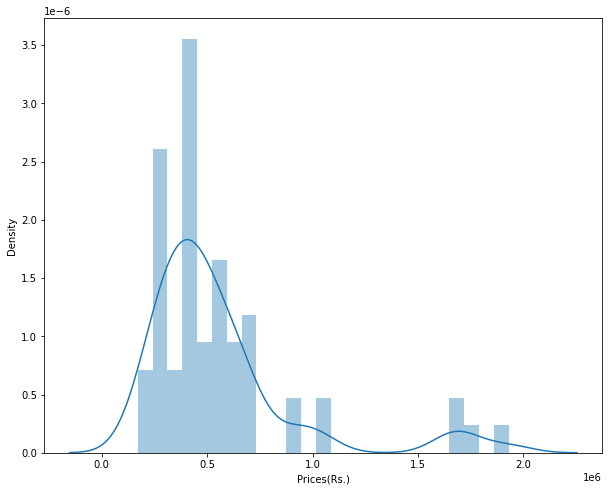

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(cars['Prices(Rs.)'])

- The highest price of a car is 20.5lacs as displayed in the graph and the lowest one is 2.25lacs

In [24]:
cars[['Prices(Rs.)','EMI(/month)','KM Driven']].describe()

,Prices(Rs.),EMI(/month),KM Driven
count,4.800000e+02,480.000000,480.000000
mean,5.590619e+05,10790.300000,37296.433333
std,3.705992e+05,6901.607682,24921.566617
min,1.714990e+05,3353.000000,1925.000000
25%,3.471490e+05,6786.750000,12733.750000
50%,4.375490e+05,8554.000000,36528.500000
75%,6.323240e+05,12362.000000,54521.750000
max,1.929699e+06,36238.000000,94759.000000


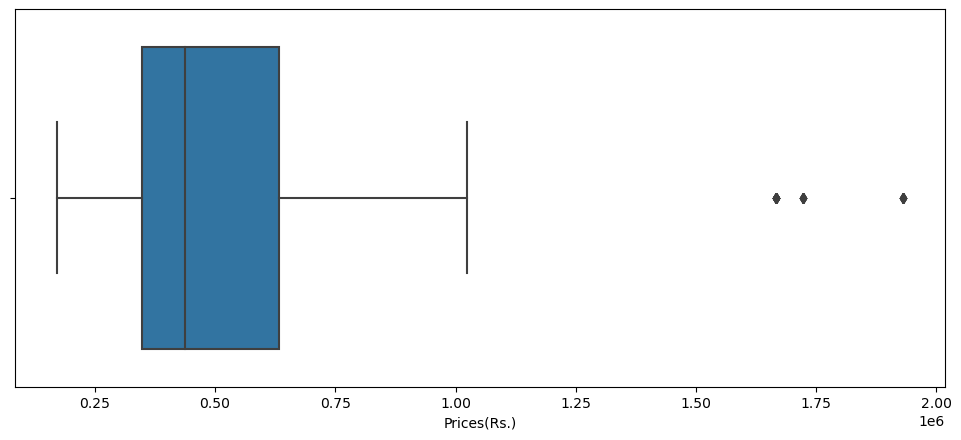

In [25]:
plt.figure(figsize=(12,5),dpi = 100)
sns.boxplot(data = cars,x='Prices(Rs.)');

### Brand

In [26]:
df['Brand'].value_counts()

Maruti      256
Hyundai     128
KIA          24
Renault      24
Tata         16
Honda        16
Mercedes      8
Nissan        8
Name: Brand, dtype: int64

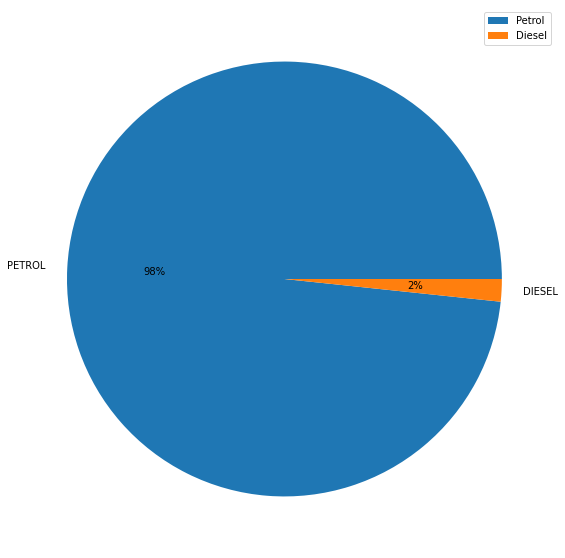

In [27]:
plt.figure(figsize=(10,10))
c=['Petrol','Diesel']
my_labels = ['PETROL','DIESEL']
plt.pie(cars['Fuel Type'].value_counts(),autopct="%.0f%%",labels =my_labels)
plt.legend(c,loc='upper right')
plt.show()

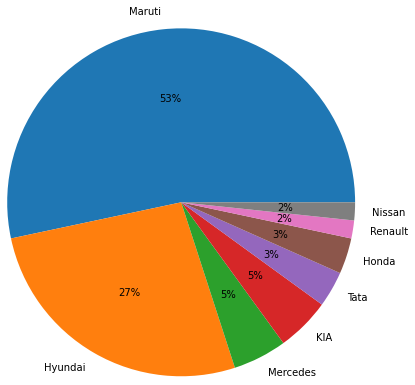

In [28]:
labels = df['Brand'].unique().tolist()
values = df['Brand'].value_counts().tolist()

plt.axis("equal")
plt.pie(values, labels=labels, radius=2, autopct='%1.0f%%')
plt.show();

# Observation

As we can see in the above graph,Renault and KIA are most available used cars in carz24.com 

### Fuel Types

In [29]:
df['Fuel Type'].value_counts()

Petrol    472
Diesel      8
Name: Fuel Type, dtype: int64

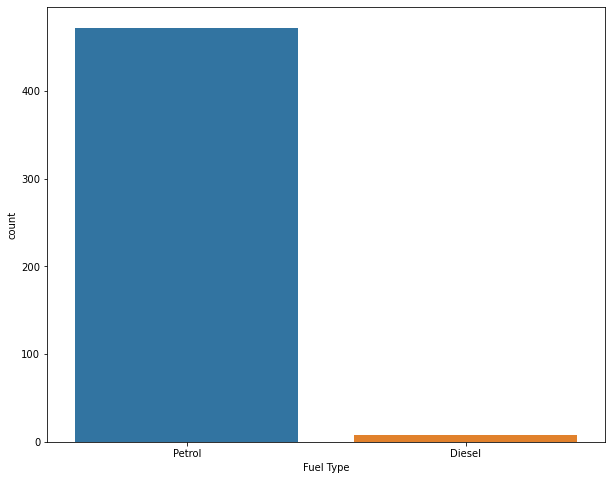

In [30]:
plt.figure(figsize=(10,8)) # set size of the figure
sns.countplot(data = df,x = 'Fuel Type')
plt.xticks(rotation = 0);

- From the above analysis Petrol type of engines are most available than Diesel

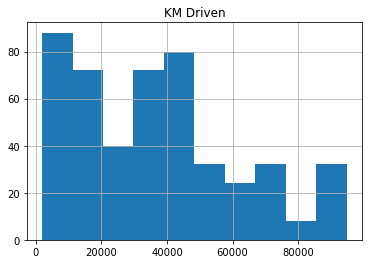

In [31]:
cars.hist(column='KM Driven', bins=10);

- From the above analysis most of the cars travelled 30,000 – 39,000 kms The least of the cars travelled 77,000 – 83,000 kms.

## Year 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

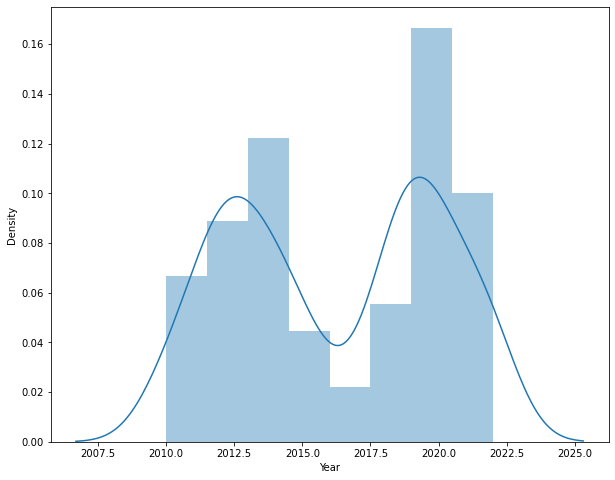

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(cars['Year'])

## Bi-variate plots

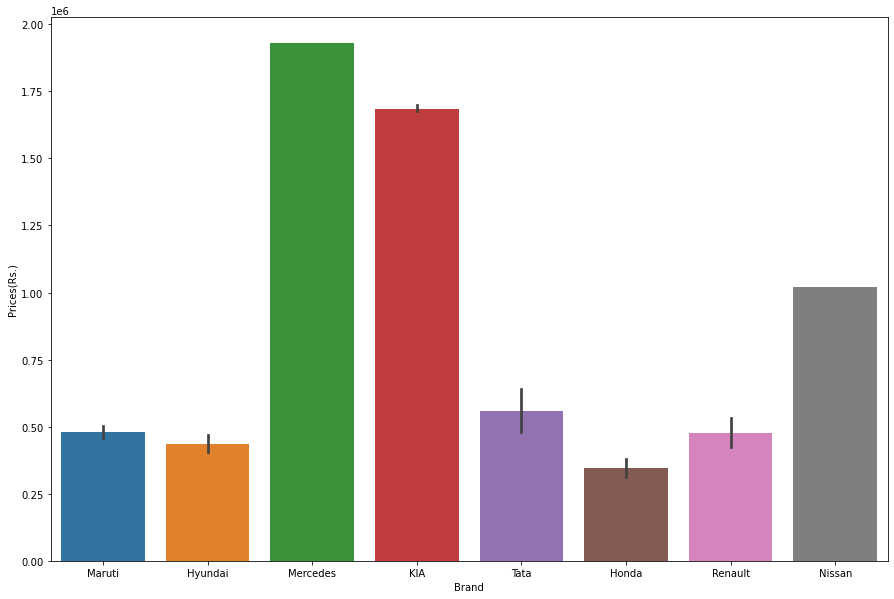

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Brand', y = 'Prices(Rs.)' , data = cars);

# Observation 

- MG is the most prized cars in carz24.com 
+ Renault cars are the cheaper cars in carz24.com 
- Hyundai,Honda,Maruti,Volkswagen,ford,tata cars are more afordable cars in carz24.com

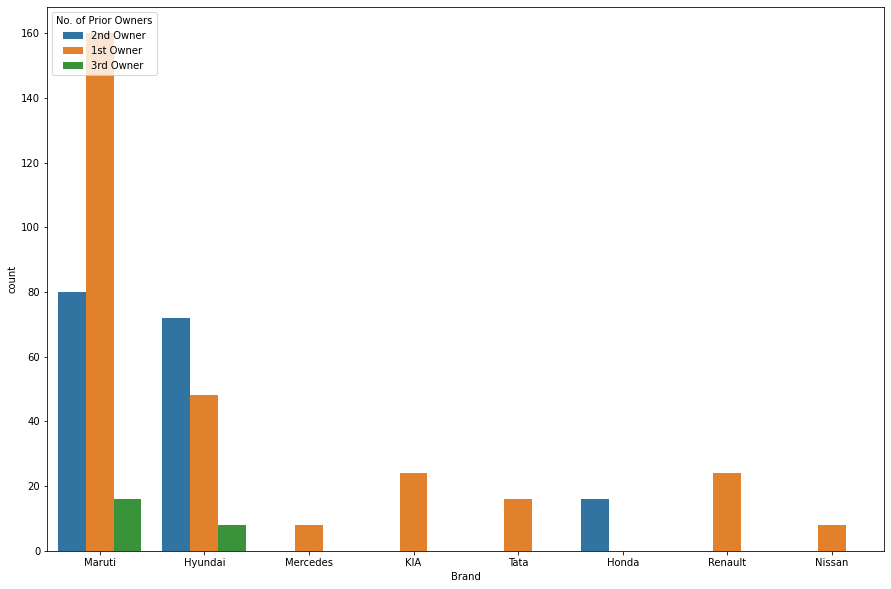

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(x='Brand',data=cars,hue='No. of Prior Owners')
plt.show()

- From the above graph, Maximum cars in carz24.com are 1st Owned only 

### Heatmap Graph

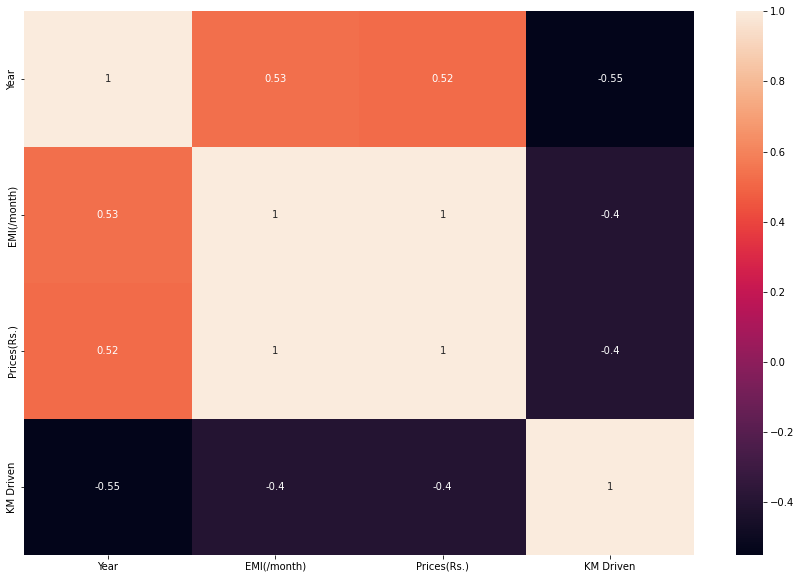

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(cars.corr(),annot=True)
plt.show()